# Unsupervised Approach

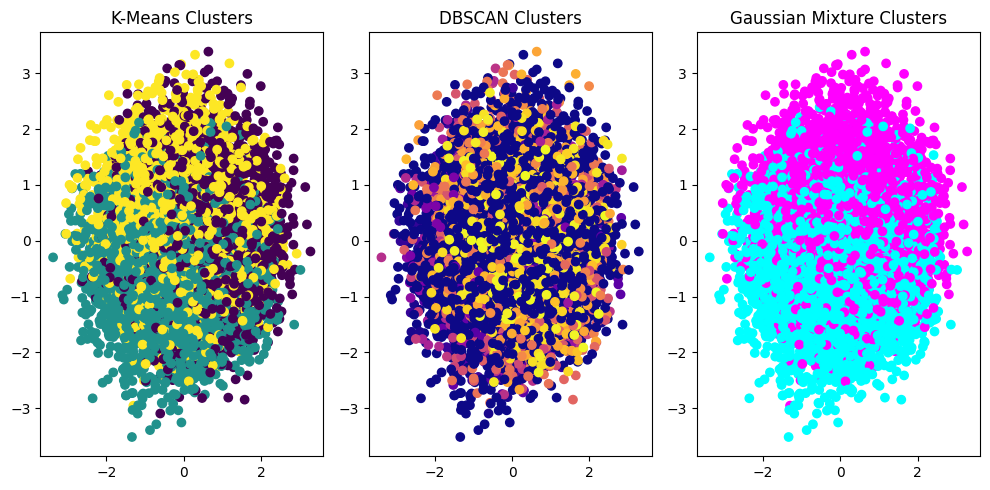

      Unnamed: 0  Calories  Protein  Carbohydrates   Fat  Fiber  Sugars  \
0              0       173     42.4           83.7   1.5    1.5    12.7   
1              1        66     39.2           13.8   3.2    2.6    12.2   
2              2       226     27.1           79.1  25.8    3.2    44.7   
3              3       116     43.4           47.1  16.1    6.5    44.1   
4              4       500     33.9           75.8  47.0    7.8    19.4   
...          ...       ...      ...            ...   ...    ...     ...   
9995        9995       346     29.8           55.6   4.6    1.7     0.5   
9996        9996       174     22.9           54.9  32.1    2.5     5.9   
9997        9997        63     36.5           23.8  21.6    0.8    48.9   
9998        9998       564     26.2           58.9  11.9    3.3    43.0   
9999        9999       442     20.9           27.3  29.6    9.9    30.9   

      Sodium  Cholesterol  diabetes  obesity  bp  KMeans_Cluster  \
0        752          125      

In [2]:
# food_pattern_unsupervised.py

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# -------------------------------
# 1️⃣ Load or Create Dataset
# -------------------------------
# Example structure – replace with your actual food data
# Columns could be: calories, protein, fat, sugar, fiber, etc.

df = pd.read_csv("processed_nutrition_data_with_disease.csv")
df = df.drop(columns=['healthy','Food_Item','Category'])   

# -------------------------------
# 2️⃣ Preprocess Data
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# -------------------------------
# 3️⃣ K-Means Clustering
# -------------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
df["KMeans_Cluster"] = kmeans.fit_predict(X_scaled)

# -------------------------------
# 4️⃣ DBSCAN Clustering
# -------------------------------
dbscan = DBSCAN(eps=1.5, min_samples=2)
df["DBSCAN_Cluster"] = dbscan.fit_predict(X_scaled)

# -------------------------------
# 5️⃣ Gaussian Mixture Model (GMM)
# -------------------------------
gmm = GaussianMixture(n_components=3, random_state=42)
df["GMM_Cluster"] = gmm.fit_predict(X_scaled)

# -------------------------------
# 6️⃣ Optional: Visualize 2D Patterns
# -------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["KMeans_Cluster"], cmap="viridis")
plt.title("K-Means Clusters")

plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["DBSCAN_Cluster"], cmap="plasma")
plt.title("DBSCAN Clusters")

plt.subplot(1, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["GMM_Cluster"], cmap="cool")
plt.title("Gaussian Mixture Clusters")

plt.tight_layout()
plt.show()

# -------------------------------
# 7️⃣ (Optional) Use KNN if you later get labels
# -------------------------------
# Suppose you add a “health_label” column with 0=Unhealthy, 1=Healthy
# Then you can use supervised KNN for pattern validation:
# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(X_scaled, df["health_label"])
# preds = knn.predict(X_scaled)

# -------------------------------
# 8️⃣ Show Results
# -------------------------------
print(df)


In [3]:
dbscan = DBSCAN(eps=0.8, min_samples=5)  # reduce eps to tighten clusters


Text(0.5, 1.0, 'DBSCAN Clusters')

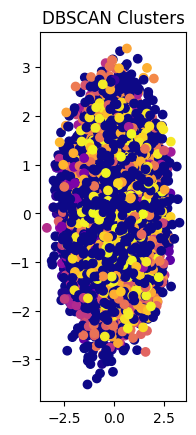

In [4]:
plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["DBSCAN_Cluster"], cmap="plasma")
plt.title("DBSCAN Clusters")

In [5]:
# Analyze average nutrients per cluster
cluster_summary = df.groupby("KMeans_Cluster")[["Calories", "Protein", "Fat", "Sugars", "Fiber"]].mean()
print(cluster_summary)

# Auto-label based on simple rule
def label_cluster(row):
    if row["Calories"] < 150 and row["Fat"] < 5 and row["Sugars"] < 10:
        return "Healthy"
    elif row["Calories"] < 300:
        return "Moderate"
    else:
        return "Unhealthy"

df["Health_Category"] = df.apply(label_cluster, axis=1)
print(df[["Calories", "Fat", "Sugars", "Health_Category"]].head())


                  Calories    Protein        Fat     Sugars     Fiber
KMeans_Cluster                                                       
0               328.291680  24.740767  24.886576  26.679988  1.661243
1               326.512082  25.906900  25.383057  24.210073  6.591121
2               328.332233  25.886375  26.027731  24.342047  6.560054
   Calories   Fat  Sugars Health_Category
0       173   1.5    12.7        Moderate
1        66   3.2    12.2        Moderate
2       226  25.8    44.7        Moderate
3       116  16.1    44.1        Moderate
4       500  47.0    19.4       Unhealthy


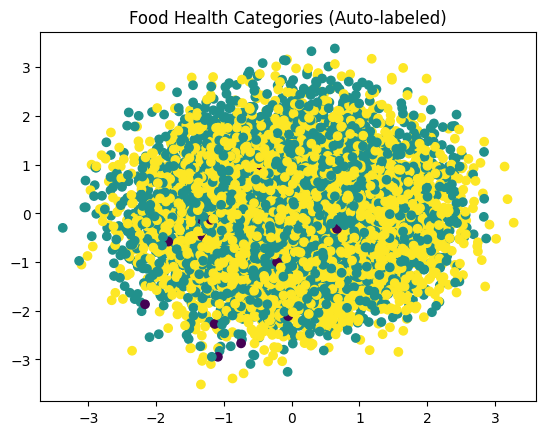

In [6]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pd.Categorical(df["Health_Category"]).codes, cmap="viridis")
plt.title("Food Health Categories (Auto-labeled)")
plt.show()